In [ ]:
'''USER: Select the project, chip, runID, well, and unit for the data you want to analyze.'''
base_dir = "/home/adamm/workspace/RBS_axonal_reconstructions/development_scripts"
project = 'templates_04Nov2024'
date = '241021'
chip = 'M06804'
runID = '000091'
well = '000'
unit = '631'

In [14]:
import sys
import os

'''Local Imports'''
def get_git_root():
    git_root = os.popen('git rev-parse --show-toplevel').read().strip()
    return git_root
git_root = get_git_root()
sys.path.insert(0, git_root)
from modules.analyze_and_reconstruct.lib_analysis_functions import *

import dill
test_path = "/home/adamm/workspace/RBS_axonal_reconstructions/development_scripts/templates_04Nov2024/241021/M06804/AxonTracking/000091/well000_recon/68_gtr_object.dill"
dill_path = f"{base_dir}/{project}/{date}/{chip}/AxonTracking/{runID}/well{well}_recon/{unit}_gtr_object.dill"
# Load dill file

with open(dill_path, 'rb') as f:
    data = dill.load(f)
    gtr = data

Figure saved to Reconstruction.pdf
Plot generated and saved to Reconstruction.pdf


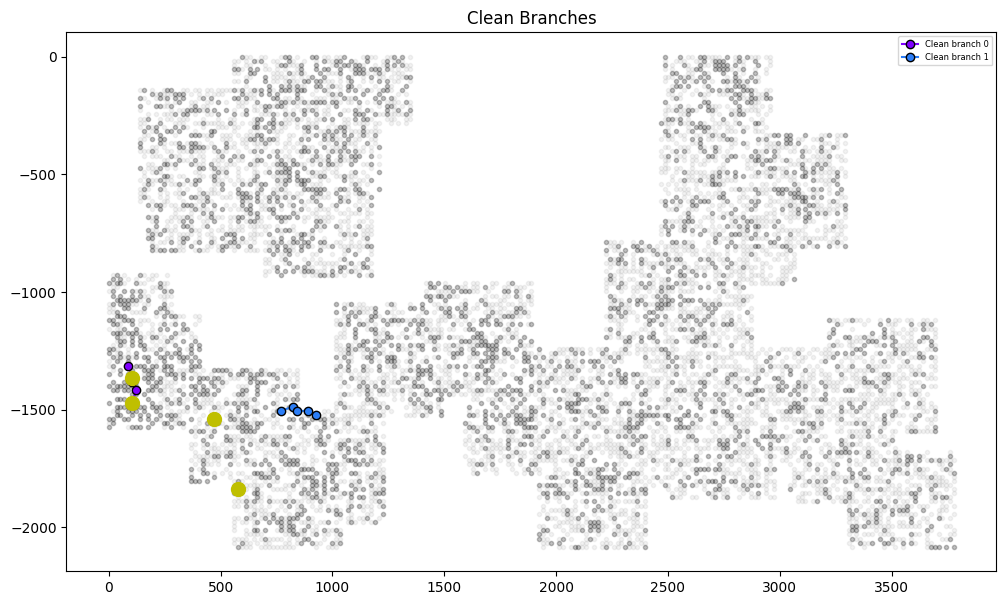

In [15]:
import os
import matplotlib.pyplot as plt

# Assuming gtr is an object with a method plot_clean_branches
# Assuming save_figure is a function that saves the figure to a file
# Assuming successful_recons is a dictionary to store successful reconstructions
# Assuming recon_dir and unit_id are defined variables
# Assuming plot_full_template and fresh_plots are defined variables

def save_figure(fig, path):
    """
    Save the figure to the specified path.
    
    Parameters:
    fig (matplotlib.figure.Figure): The figure to save.
    path (str): The path where the figure will be saved.
    """
    fig.savefig(path)
    print(f"Figure saved to {path}")

# Example values for the variables
recon_dir = "example_recon_dir"
unit_id = 1
plot_full_template = True
fresh_plots = False
successful_recons = {recon_dir: {"successful_units": {}}}

fig_graph = plt.figure(figsize=(12, 7))
ax_raw = fig_graph.add_subplot(111)
axpaths_raw = ax_raw
fig_path = "Reconstruction.pdf"

# if os.path.exists(fig_path) and not fresh_plots:
#     print(f"Figure already exists at {fig_path} and fresh_plots is False. Skipping plot generation.")
# else:
axpaths_raw = gtr.plot_clean_branches(
    plot_full_template=plot_full_template, ax=axpaths_raw, cmap="rainbow",
    plot_bp=True, branch_colors=None
)
axpaths_raw.legend(fontsize=6)
axpaths_raw.set_title("Clean Branches")
save_figure(fig_graph, fig_path)
successful_recons[str(recon_dir)]["successful_units"][str(unit_id)] = {}
print(f"Plot generated and saved to {fig_path}")

# Display the plot in the notebook
plt.show()

Figure saved to Template_Propagation.pdf


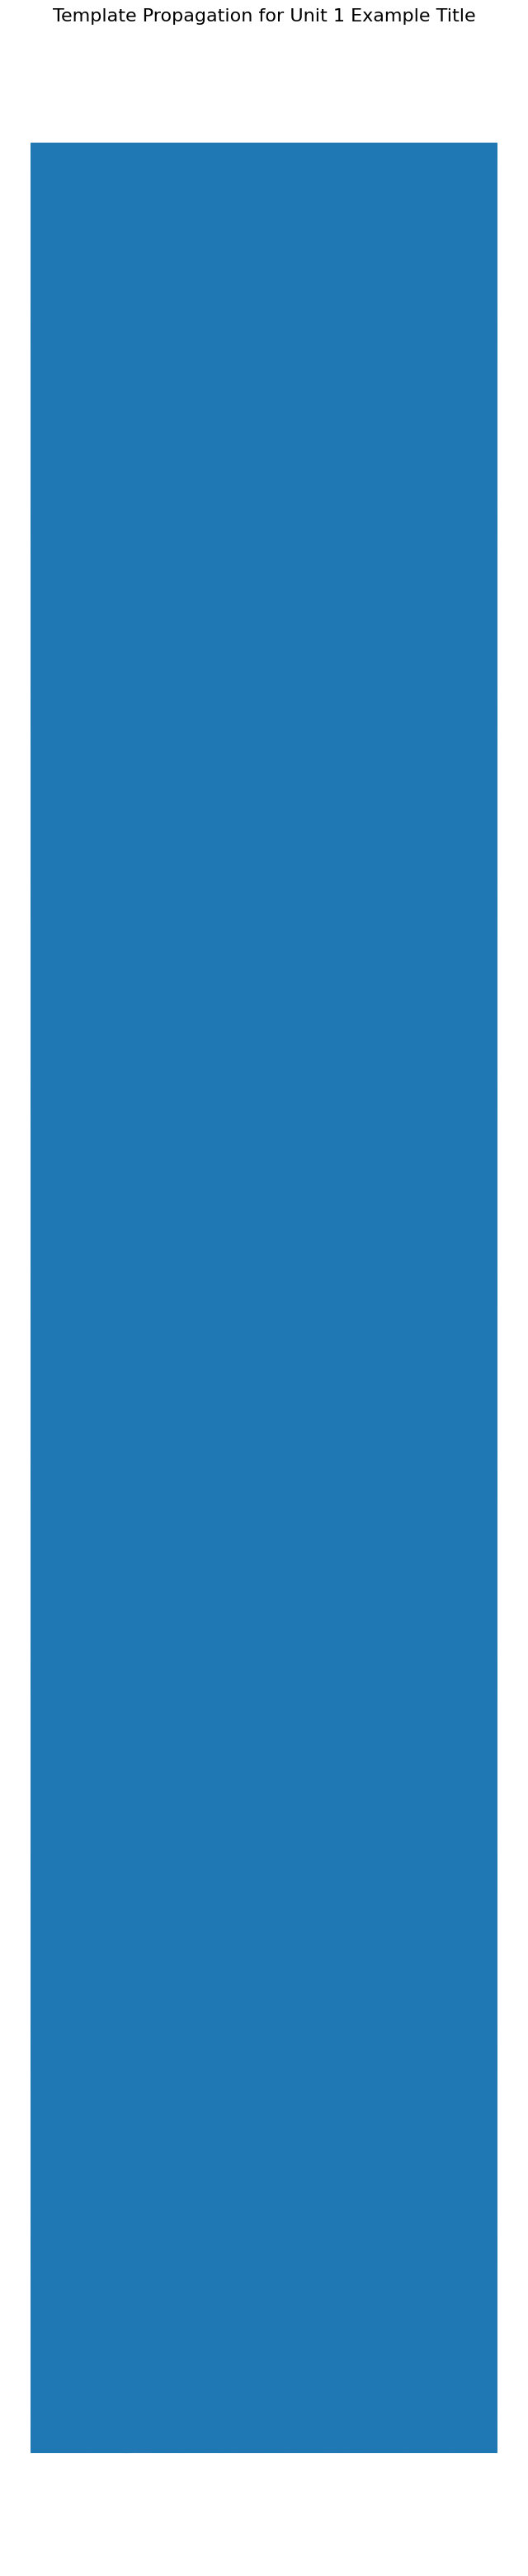

In [16]:
import os
import matplotlib.pyplot as plt
from submodules.axon_velocity_fork import axon_velocity as av

def plot_template_propagation(gtr, fig_dir, unit_id, title, fresh_plots=False, figsize=(8, 40), 
                              linewidth=1, markerfacecolor='r', markersize=5, dpi=300, 
                              max_overlapped_lines=1, color_marker='none', marker='.'):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    fig_path = fig_dir
    # if os.path.exists(fig_path) and not fresh_plots:
    #     print(f"Figure already exists at {fig_path} and fresh_plots is False. Skipping plot generation.")
    #     return
    template = gtr.template
    selected_channels = gtr.selected_channels
    locations = gtr.locations
    ax = av.plotting.plot_template_propagation(
        template, locations, selected_channels, sort_templates=True,
        color=None, color_marker=color_marker, ax=ax, 
        #linewidth=linewidth, 
        #markerfacecolor=markerfacecolor, 
        #markersize=markersize, 
        #max_overlapped_lines=max_overlapped_lines, 
        #marker=marker
    )
    ax.set_title(f'Template Propagation for Unit {unit_id} {title}', fontsize=16)
    save_figure(fig, fig_path)

# Example usage
# Assuming gtr is an object with the necessary attributes and methods
# Assuming fig_dir, unit_id, and title are defined variables
fig_dir = "Template_Propagation.pdf"
unit_id = 1
title = "Example Title"
plot_template_propagation(gtr, fig_dir, unit_id, title)